# PARAFAC2 tutorial

A tutorial on PARAFAC2 taken from [here](https://tensorly.org/stable/auto_examples/decomposition/plot_parafac2.html).

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac2
from scipy.optimize import linear_sum_assignment


They generate a tensor of the form: $$\mathcal{X}_{i j k}=\sum_{r=1}^R A_{i r} B_{\sigma_i(j) r} C_{k r},$$ where $\sigma_i$ is a cyclic permutation of $J$ elements

In [2]:
# Set parameters
true_rank = 3
I, J, K = 30, 40, 20
noise_rate = 0.1
np.random.seed(0)

# Generate random matrices
A_factor_matrix = np.random.uniform(1, 2, size=(I, true_rank))
B_factor_matrix = np.random.uniform(size=(J, true_rank))
C_factor_matrix = np.random.uniform(size=(K, true_rank))

# Normalised factor matrices
A_normalised = A_factor_matrix / la.norm(A_factor_matrix, axis=0)
B_normalised = B_factor_matrix / la.norm(B_factor_matrix, axis=0)
C_normalised = C_factor_matrix / la.norm(C_factor_matrix, axis=0)

# Generate the shifted factor matrix
B_factor_matrices = [np.roll(B_factor_matrix, shift=i, axis=0) for i in range(I)]
Bs_normalised = [np.roll(B_normalised, shift=i, axis=0) for i in range(I)]

# Construct the tensor
tensor = np.einsum(
    "ir,ijr,kr->ijk", A_factor_matrix, B_factor_matrices, C_factor_matrix
)

# Add noise
noise = np.random.standard_normal(tensor.shape)
noise /= np.linalg.norm(noise)
noise *= noise_rate * np.linalg.norm(tensor)
tensor += noise


In [3]:
tensor.shape


(30, 40, 20)

In [4]:
best_err = np.inf
decomposition = None

for run in range(10):
    print(f"Training model {run}...")
    trial_decomposition, trial_errs = parafac2(
        tensor,
        true_rank,
        return_errors=True,
        tol=1e-8,
        n_iter_max=500,
        random_state=run,
    )
    print(f"Number of iterations: {len(trial_errs)}")
    print(f"Final error: {trial_errs[-1]}")
    if best_err > trial_errs[-1]:
        best_err = trial_errs[-1]
        err = trial_errs
        decomposition = trial_decomposition
    print("-------------------------------")
print(f"Best model error: {best_err}")


Training model 0...
Number of iterations: 500
Final error: 0.09204720575424455
-------------------------------
Training model 1...
Number of iterations: 500
Final error: 0.092047268560127
-------------------------------
Training model 2...
Number of iterations: 500
Final error: 0.0926971180418722
-------------------------------
Training model 3...
Number of iterations: 392
Final error: 0.09204692795621926
-------------------------------
Training model 4...
Number of iterations: 415
Final error: 0.0920469295922308
-------------------------------
Training model 5...
Number of iterations: 500
Final error: 0.09291065541285934
-------------------------------
Training model 6...
Number of iterations: 364
Final error: 0.09204692769766251
-------------------------------
Training model 7...
Number of iterations: 424
Final error: 0.09204692883956105
-------------------------------
Training model 8...
Number of iterations: 481
Final error: 0.09204693125447462
-------------------------------
Train

In [10]:
decomposition


(weights, factors, projections) : rank-3 Parafac2Tensor of shape ((40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20), (40, 20)) 

In [11]:
from tensorly import parafac2_tensor

decomp_tensor = parafac2_tensor.parafac2_to_tensor(decomposition)
projection_matrices = parafac2_tensor.apply_parafac2_projections(decomposition)



In [13]:
F = decomposition.factors


This has not been helpful. Still no idea how to intepret the results. Maybe start with PARAFAC then move to PARAFAC2?

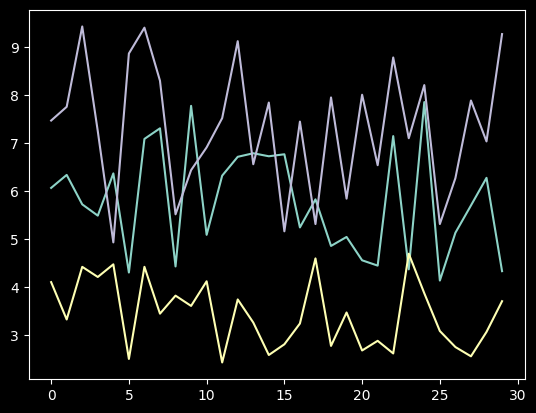

In [15]:
import matplotlib.pyplot as plt

y = decomposition.factors[0]
# print(y.shape)
# print(y)
plt.plot(y);


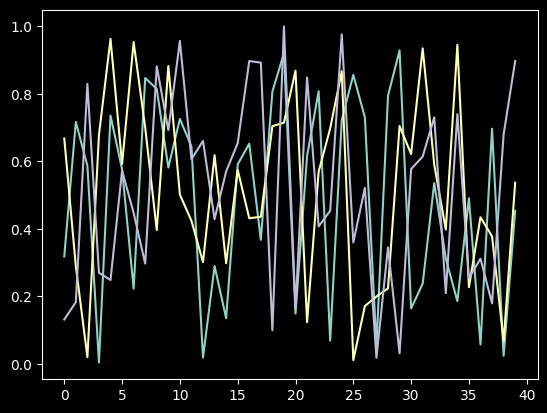

In [22]:
plt.plot(B_factor_matrix)
